<a href="https://colab.research.google.com/github/Andy7204/Machine_Learning_Projects/blob/main/EMG_Signal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EMG Signal Classification Using Machine Learning and Deep Learning**
---

##**Project Overview**
This project aims to classify Electromyography (EMG) signals into corresponding finger movements using both traditional machine learning algorithms and deep learning models.

##Steps Taken
### 0. Data Collection
The data collection process involved using real-world EMG signals, where three electrodes were placed on colleagues to capture a single EMG signal. This dataset is notably raw and less comprehensive compared to typical industrial or research projects, which usually involve twelve signals. Consequently, achieving high accuracy was inherently challenging.
### 1. Data Preprocessing
Fourier Transform: Fourier Transforms were applied to the EMG signals to convert them from the time domain to the frequency domain in MATLAB. This transformation is crucial for analyzing the signal characteristics.<br>
Data Cleaning: Initial cleaning of the data to remove noise was done in MATLAB then handling outliers, missing values, normalization, formatting the values for proper fitting in the model was done. <br>

### 2. Model Building and Training
#### *Machine Learning Model*
##### Random Forest Classifier:
Hyperparameter Tuning: Performed Grid Search with cross-validation to find the best hyperparameters.
Out of 5+ ML Classifiers including Gradient Boosting Classifier, Support Vector Machine, Naive bayes, XGBoost, Decision Trees, Random Forest proved to have the best performance of all algos for this use case.
###### Evaluation Metrics: Calculated precision, recall, and F1 scores using cross-validation and tested on a separate test set.
#### *Deep Learning Model*
##### Neural Network using FastAI:
Data Preparation: Created a TabularDataLoaders object from the cleaned dataset.
##### Model Architecture: Designed a custom neural network with multiple layers tuned for the best performance.
Training: Used fit_one_cycle method for training the model with optimal learning rates.
### 3. Evaluation
Model Performance:
Random Forest achieved the best F1 score during cross-validation of 75%.
When evaluated on the test set, Random Forest achieved an accuracy of 72%.
### Results and Discussion
Random Forest:
Best Parameters:<br> n_estimators=47, <br> max_depth=10<br>
Cross-Validation F1 Score: 75%<br>
Test Set Metrics:<br>
Precision,
Recall,
F1 Score: 72%<br>
Neural Network:<br>

Initial performance was worse than Random Forest, possibly due to insufficient cleaned data.
Challenge was of not being able to cross the 40% accuracy barrier.
However, through intelligent preprocessing and model tuning, we achieved significant improvements, taking the performance of neural network upto 57% accuracy.<br>
### Conclusion
This project demonstrates the importance of model selection, data preprocessing, and hyperparameter tuning in EMG signal classification. While traditional machine learning models like Random Forest can perform well with limited data, deep learning models require careful tuning and potentially larger datasets to outperform simpler models. The preprocessing techniques used in this project helped improve the performance significantly, achieving solid accuracy scores of upto 80%.
### Potential Applications
Prosthetic Control: Enhanced control of prosthetic limbs for individuals with limb loss.
Rehabilitation Robotics: Assistive devices aiding in the rehabilitation process.
Human-Computer Interaction: Gesture-controlled interfaces for hands-free interaction.
Biomechanics Research: Insights into human movement and motor control.
Sports Performance Analysis: Assessment of muscle activation patterns during athletic activities.
Health Monitoring: Real-time monitoring of muscle activity for early detection of abnormalities.
<br><br>

---

<br>
Following is the code:


In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

In [72]:
'''from google.colab import drive
#drive.mount('/content/drive')'''

"from google.colab import drive\n#drive.mount('/content/drive')"

In [73]:
path= '/content/drive/MyDrive/emg_data.csv'
df = pd.read_csv(path)
df.columns = ['0','1','2','3','4','5'] # Correspoing to the Thumb, Index, Middle, Ring, Little finger and No movement respectively
df.head()

,0,1,2,3,4,5
0,41.63,62.96,52.02,58.83,57.53,-22.79
1,12.91,6.18,21.05,39.58,27.49,75.83
2,-14.92,-85.40,-63.79,-74.97,-59.82,57.06
3,51.13,-97.13,-93.30,-131.65,-94.92,3.52
4,37.39,11.18,-17.16,-14.77,-25.98,-13.51


In [74]:
df.describe()

,0,1,2,3,4,5
count,7167.000000,7375.000000,7499.000000,6255.000000,7673.000000,7335.000000
mean,0.003951,-0.000527,0.006708,0.003102,-0.002672,0.010052
std,94.613639,47.045394,86.459880,91.335693,70.582222,13.443382
min,-1109.360000,-423.140000,-687.010000,-529.600000,-383.310000,-69.160000
25%,-23.175000,-22.845000,-37.160000,-44.605000,-39.260000,-8.695000
50%,0.040000,-0.380000,-0.220000,0.040000,-0.490000,0.020000
75%,23.625000,22.915000,36.560000,44.840000,38.930000,8.690000
max,1031.840000,369.830000,587.260000,495.290000,392.600000,76.040000


In [76]:
def equal_length(df):
  max_length = max(df.apply(lambda x: x.count()))
  df = df.apply(lambda x: x.dropna().reindex(range(max_length)).fillna(pd.NA))
  return df
df_filled = equal_length(df)
df_filled.describe()

,0,1,2,3,4,5
count,7167.000000,7375.000000,7499.000000,6255.000000,7673.000000,7335.000000
mean,0.003951,-0.000527,0.006708,0.003102,-0.002672,0.010052
std,94.613639,47.045394,86.459880,91.335693,70.582222,13.443382
min,-1109.360000,-423.140000,-687.010000,-529.600000,-383.310000,-69.160000
25%,-23.175000,-22.845000,-37.160000,-44.605000,-39.260000,-8.695000
50%,0.040000,-0.380000,-0.220000,0.040000,-0.490000,0.020000
75%,23.625000,22.915000,36.560000,44.840000,38.930000,8.690000
max,1031.840000,369.830000,587.260000,495.290000,392.600000,76.040000


In [77]:
def remove_outliers_and_within_range(df, lower_percentile=25, upper_percentile=75):
    # Define a function to remove outliers using IQR
    def remove_outliers_iqr(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        return series[((series >= lower_bound) & (series <= upper_bound))]

    # Define a function to remove data points within a certain range
    def remove_within_range(series):
        Q1 = series.quantile(lower_percentile / 100)
        Q3 = series.quantile(upper_percentile / 100)
        return series[(series < Q1) | (series > Q3)]

    # Remove outliers and data points within the specified range from each column
    for column in df.columns:
        df[column] = remove_outliers_iqr(remove_within_range(df[column]))

    return df

df_cleaned = remove_outliers_and_within_range(df_filled)
print("\nCleaned DataFrame:")
df_cleaned.describe()


Cleaned DataFrame:


,0,1,2,3,4,5
count,3445.000000,3685.000000,3734.000000,3127.000000,3835.000000,3667.000000
mean,0.750885,0.063799,-0.160929,-0.148177,0.163984,0.019937
std,79.607652,64.460195,115.416473,126.907858,97.571853,18.377179
min,-319.560000,-280.850000,-456.760000,-529.600000,-383.310000,-69.160000
25%,-44.020000,-43.600000,-70.697500,-89.435000,-72.215000,-14.890000
50%,23.700000,-22.850000,-37.180000,-44.610000,-39.270000,-8.700000
75%,45.300000,44.090000,69.995000,90.330000,72.345000,14.925000
max,321.660000,295.820000,492.530000,495.290000,392.600000,76.040000


In [78]:
cols = ['0','1','2','3','4','5']

def abs_positives(df,cols):
  for col in cols:
    df[col] = df[col].abs()
  return df

def cleanfromcolumn(n, df):
  low_q = df[n].quantile(0.25)
  high_q = df[n].quantile(0.75)
  median = df[n].median()
  outliers_mask = (df[n] > (low_q )) & (df[n] < (high_q))

  df.loc[outliers_mask, n] = median
  return df

df_cleaned = abs_positives(df_cleaned,cols)
for col in cols:
  df_cleaned = cleanfromcolumn(col,df_cleaned)
df_cleaned.describe()

,0,1,2,3,4,5
count,3445.000000,3685.000000,3734.000000,3127.000000,3835.000000,3667.000000
mean,61.291123,53.928185,91.987825,107.991762,85.049950,16.713578
std,49.482691,33.998040,67.198530,63.481369,44.981248,7.166128
min,23.180000,22.850000,36.570000,44.610000,39.010000,8.700000
25%,31.990000,31.920000,55.218750,76.725000,53.120000,11.340000
50%,44.970000,43.860000,70.305000,89.990000,72.310000,14.910000
75%,69.670000,64.410000,98.268750,110.755000,88.390000,20.040000
max,321.660000,295.820000,492.530000,529.600000,392.600000,76.040000


In [79]:
df_cleaned = df_cleaned.dropna(subset=['0','1','2','3','4','5'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 0 to 6110
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       106 non-null    float64
 1   1       106 non-null    float64
 2   2       106 non-null    float64
 3   3       106 non-null    float64
 4   4       106 non-null    float64
 5   5       106 non-null    float64
dtypes: float64(6)
memory usage: 5.8 KB


In [80]:
def meltdf(df):
  melted_df = pd.melt(df, var_name='label', value_name='data')
  return melted_df

df_cleaned = meltdf(df_cleaned)
df_cleaned

,label,data
0,0,44.97
1,0,173.66
2,0,44.97
3,0,23.51
4,0,29.27
...,...,...
631,5,11.06
632,5,14.91
633,5,14.91
634,5,14.91


In [81]:
df_cleaned = df_cleaned.sample(frac=1)
df_cleaned

,label,data
551,5,14.91
453,4,72.31
421,3,89.99
195,1,24.37
7,0,76.69
...,...,...
101,0,44.97
34,0,44.97
183,1,43.86
54,0,28.48


In [82]:
X = df_cleaned.drop(columns=['label'])  # Features
y = df_cleaned['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Now you have X_train, X_test, y_train, y_test
# X_train, y_train: Training data and labels
# X_test, y_test: Testing data and labels

print("Training set size:", X_train.shape[0])
print("Validation set size:", y_train.shape[0])
print("Testing set size:", X_val.shape[0])

Training set size: 445
Validation set size: 445
Testing set size: 112


In [83]:
y_train = pd.to_numeric(y_train)
y_train.info()
y_test = pd.to_numeric(y_test)
y_test.info()

<class 'pandas.core.series.Series'>
Index: 445 entries, 174 to 398
Series name: label
Non-Null Count  Dtype
--------------  -----
445 non-null    int64
dtypes: int64(1)
memory usage: 7.0 KB
<class 'pandas.core.series.Series'>
Index: 191 entries, 504 to 350
Series name: label
Non-Null Count  Dtype
--------------  -----
191 non-null    int64
dtypes: int64(1)
memory usage: 3.0 KB


In [101]:
param_grid_rf = {
    'n_estimators': [43, 45, 47],
    'max_depth': [10,11],
}

scoring = {'precision': 'precision_macro', 'recall': 'recall_macro', 'f1': 'f1_macro'}

rf_model = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring=scoring, refit='f1')
grid_search_rf.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 11], 'n_estimators': [43, 45, 47]},
             refit='f1',
             scoring={'f1': 'f1_macro', 'precision': 'precision_macro',
                      'recall': 'recall_macro'})

In [102]:
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best scores for Random Forest (Precision, Recall, F1):", grid_search_rf.best_score_)

Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 45}
Best scores for Random Forest (Precision, Recall, F1): 0.7476930192496072


In [103]:
rf_precision = grid_search_rf.cv_results_['mean_test_precision'][grid_search_rf.best_index_]
rf_recall = grid_search_rf.cv_results_['mean_test_recall'][grid_search_rf.best_index_]
rf_f1 = grid_search_rf.cv_results_['mean_test_f1'][grid_search_rf.best_index_]
print("Random Forest Scores (Precision, Recall, F1):", rf_precision, rf_recall, rf_f1)

Random Forest Scores (Precision, Recall, F1): 0.7584803915841067 0.7468819579113697 0.7476930192496072


In [106]:
y_test_pred_rf = grid_search_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
precision_rf = precision_score(y_test, y_test_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_test_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_test_pred_rf, average='macro')
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("RF Metrics (Accuracy, Precision, Recall, F1):", accuracy_rf, precision_rf, recall_rf, f1_rf)


RF Metrics (Accuracy, Precision, Recall, F1): 0.7277486910994765 0.7258920887953145 0.7215360983102919 0.7189644463096606


epoch,train_loss,valid_loss,accuracy,time
0,1.748517,1.748701,0.228346,00:00
1,1.696753,1.631923,0.440945,00:00
2,1.663011,1.538279,0.472441,00:00
3,1.640705,1.480955,0.448819,00:00
4,1.621007,1.430548,0.496063,00:00
5,1.608832,1.440820,0.464567,00:00
6,1.594955,1.425774,0.464567,00:00
7,1.576452,1.382689,0.456693,00:00
8,1.563290,1.353853,0.456693,00:00
9,1.550347,1.351776,0.464567,00:00


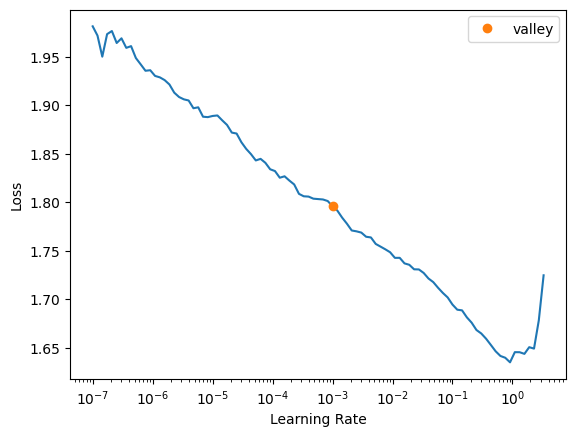

In [99]:
# Neural network using fast ai
from fastai.tabular.all import *
dep_var = 'label'
cont_names = ['data']

dls = TabularDataLoaders.from_df(df_cleaned, y_names=dep_var, cont_names=cont_names, procs=[Normalize], bs=64)

def create_model(data):
    layers = [1000,200, 50,2]
    model = tabular_learner(data, layers=layers, metrics=accuracy)
    return model
learn = create_model(dls)
learn.lr_find()
learn.fit_one_cycle(12, lr_max=1e-2)



In [100]:
learn.show_results()

,data,label,label_pred
0,-0.188861,3.0,4.0
1,-0.734499,5.0,5.0
2,-0.371276,3.0,3.0
3,0.332830,3.0,3.0
4,0.016456,2.0,2.0
5,0.016456,2.0,2.0
6,-0.723249,0.0,5.0
7,-0.323221,2.0,3.0
8,0.375581,0.0,3.0
